In [27]:
!pip install opencv-python 
!pip install numpy
!pip install matplotlib


ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


In [31]:
import os
import cv2
import numpy as np

# Specify the folder path containing TIFF images
tiff_folder = './Images'

# Load TIFF images
image = cv2.imread("Images/01_Frame_15.tif", cv2.IMREAD_UNCHANGED)
npy_image = np.load("Images/01_Frame_15_seg.npy",allow_pickle=True)



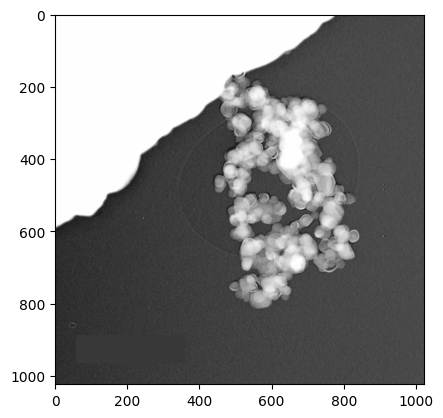

In [32]:
import matplotlib.pyplot as plt 
plt.imshow(image)

In [38]:
gt_dict = npy_image.tolist()

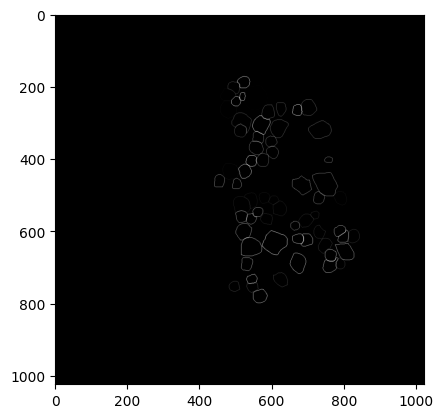

In [41]:
plt.imshow(gt_dict['outlines'],cmap='gray')


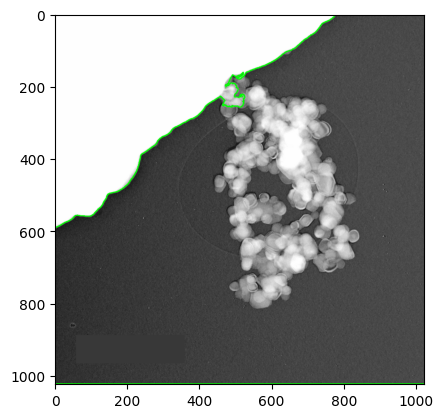

In [42]:
# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply a threshold to create a binary image
_, binary_image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Perform image segmentation
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw the contours on the original image
segmented_image = cv2.drawContours(image.copy(), contours, -1, (0, 255, 0), 2)

# Display the segmented image
plt.imshow(segmented_image)
plt.show()
